# This is a Notebook for a Anomaly Detection Deep Learning Model for Energy Forecast

## The dataset is collected from an open source online, representing a steel factory's energy readings

## The first step is to explore the dataset

## The second step is to pre-process the data

## The third step is to develop the model

### Data Exploration:

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import precision_score, recall_score, f1_score



In [22]:
# Set the random seed for reproducibility of results

rand_state = 1000

# Configure pandas to display all columns when printing dataframes

pd.set_option('display.max_columns', None)

In [23]:
# Set the level of interactivity for the IPython shell to 'all', 
# which allows all expressions in a cell to be evaluated and their results displayed

InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Read the CSV file containing the dataset

df1 = pd.read_csv('First_Dataset_Steel_Industry_data.csv')

In [25]:
# Display the data frame

df1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [26]:
# Check some important information about the data, to gain a better understanding of it

df1.shape
df1.columns
df1.info()

(35040, 11)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [27]:
# Display the data types

df1.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [28]:
# Change the date column to datetime data type

df1['date'] = pd.to_datetime(df1['date'])
df1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [29]:
df1.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

In [31]:
# Drop a few columns that will not be used in the model

cols_to_drop=['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)'
              ,'Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','WeekStatus'
              ,'Day_of_week','Load_Type']

# Set the date column as the index

df1_short = df1.drop(cols_to_drop,axis=1, inplace=False)

df1_short.set_index('date', inplace=True)

df1_short

,Usage_kWh
date,
2018-01-01 00:15:00,3.17
2018-01-01 00:30:00,4.00
2018-01-01 00:45:00,3.24
2018-01-01 01:00:00,3.31
2018-01-01 01:15:00,3.82
...,...
2018-12-31 23:00:00,3.85
2018-12-31 23:15:00,3.74
2018-12-31 23:30:00,3.78


In [32]:
df1_short.dtypes

Usage_kWh    float64
dtype: object

'\nCreating a plot to see the energy usage along the full time period of the data set\n\n'

<AxesSubplot:title={'center':'Energy_Usage'}, xlabel='date'>

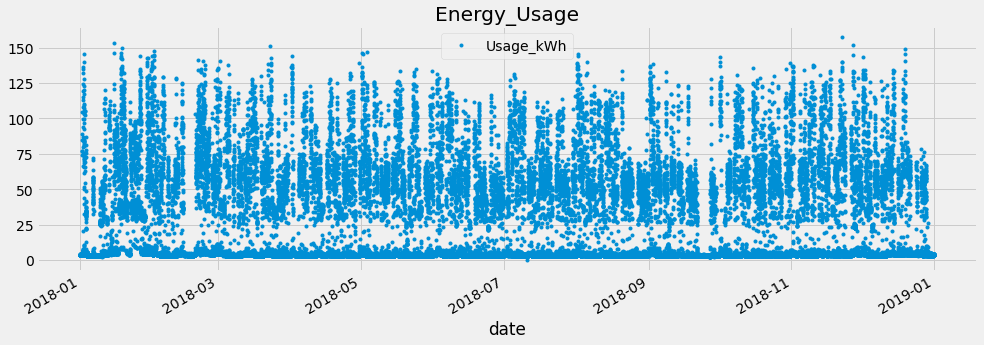

In [33]:
"""
Creating a plot to see the energy usage along the full time period of the data set

"""

df1_short.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Energy_Usage')
plt.show()

In [34]:
# Get statistical information about the data frame

df1_short.describe()

,Usage_kWh
count,35040.000000
mean,27.386892
std,33.444380
min,0.000000
25%,3.200000
50%,4.570000
75%,51.237500
max,157.180000


Text(0.05, 0.9, 'Mean: 27.39')

Text(0.05, 0.85, 'Max: 157.18')

Text(0.05, 0.8, 'Min: 0.00')

Text(0.5, 1.0, 'Usage_kWh')

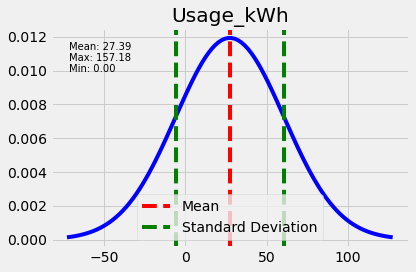

In [38]:
# Calculate mean, maximum, minimum, and standard deviation for the selected column
column_name = 'Usage_kWh'
statistics = df1_short[column_name].describe()

# Plot bell curve for the selected column
mean = statistics.loc['mean']
std_dev = statistics.loc['std']

# Generate x values for the bell curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Calculate the bell curve values
bell_curve = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2))

# Plot bell curve
plt.plot(x, bell_curve, color='blue')

# Plot standard deviation lines
std_dev_values = [mean - std_dev, mean + std_dev]
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=std_dev_values[0], color='green', linestyle='--', label='Standard Deviation')
plt.axvline(x=std_dev_values[1], color='green', linestyle='--')

# Annotate mean, maximum, and minimum points
plt.annotate('Mean: {:.2f}'.format(mean), xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
plt.annotate('Max: {:.2f}'.format(statistics.loc['max']), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
plt.annotate('Min: {:.2f}'.format(statistics.loc['min']), xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10)

# Set title for the plot
plt.title(column_name)
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# Calculate upper limit for anomalies (1.5 times the standard deviation)
upper_limit = mean + 1.5 * std_dev

# Add "Anomaly" column to the DataFrame
df1_short['Anomaly'] = (df1_short[column_name] > upper_limit).astype(int)

# Print DataFrame to verify
print(df1_short)

                     Usage_kWh  Anomaly
date                                   
2018-01-01 00:15:00       3.17        0
2018-01-01 00:30:00       4.00        0
2018-01-01 00:45:00       3.24        0
2018-01-01 01:00:00       3.31        0
2018-01-01 01:15:00       3.82        0
...                        ...      ...
2018-12-31 23:00:00       3.85        0
2018-12-31 23:15:00       3.74        0
2018-12-31 23:30:00       3.78        0
2018-12-31 23:45:00       3.78        0
2018-12-31 00:00:00       3.67        0

[35040 rows x 2 columns]


In [46]:
df1_short.dtypes

Usage_kWh    float64
Anomaly        int32
dtype: object

In [47]:
# Check how many anomalies are present in the data

occ = df1_short['Anomaly'].value_counts()
occ

0    31490
1     3550
Name: Anomaly, dtype: int64

In [48]:
df1_short

,Usage_kWh,Anomaly
date,,
2018-01-01 00:15:00,3.17,0
2018-01-01 00:30:00,4.00,0
2018-01-01 00:45:00,3.24,0
2018-01-01 01:00:00,3.31,0
2018-01-01 01:15:00,3.82,0
...,...,...
2018-12-31 23:00:00,3.85,0
2018-12-31 23:15:00,3.74,0
2018-12-31 23:30:00,3.78,0


### CNN Model

In [55]:
# Extract input (X) and output (y) columns
X = df1_short[['Usage_kWh']].values  # Input
y = df1_short['Anomaly'].values   # Output


In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Reshape input data for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [61]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Input layer
    Dense(32, activation='relu'),                   # Hidden layer
    Dense(1, activation='sigmoid')                   # Output layer
])


In [62]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
876/876 [==============================] - 2s 2ms/step - loss: 0.2139 - accuracy: 0.9519 - val_loss: 0.0536 - val_accuracy: 0.9874
Epoch 2/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0438 - accuracy: 0.9878 - val_loss: 0.0293 - val_accuracy: 0.9966
Epoch 3/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.0273 - val_accuracy: 0.9890
Epoch 4/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0317 - accuracy: 0.9874 - val_loss: 0.0341 - val_accuracy: 0.9810
Epoch 5/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0270 - accuracy: 0.9895 - val_loss: 0.0467 - val_accuracy: 0.9772
Epoch 6/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0225 - accuracy: 0.9901 - val_loss: 0.0119 - val_accuracy: 0.9987
Epoch 7/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0191 - accuracy: 0.9920 - val_loss: 0.0139 - val_accuracy: 0.9936
Epoch 

In [64]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

219/219 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9866
Test accuracy: 0.9865867495536804


In [66]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert predictions to 1D array
y_pred = y_pred.ravel()

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


219/219 [==============================] - 0s 991us/step
Confusion Matrix:
[[6281    0]
 [  94  633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6281
           1       1.00      0.87      0.93       727

    accuracy                           0.99      7008
   macro avg       0.99      0.94      0.96      7008
weighted avg       0.99      0.99      0.99      7008



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 8.73999999999998, 'Predicted Labels')

Text(24.579999999999995, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

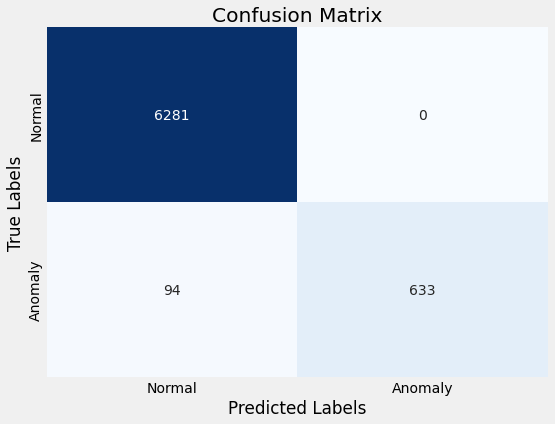

In [67]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### RNN model

In [68]:
# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

In [69]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
876/876 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.9309 - val_loss: 0.1867 - val_accuracy: 0.9638
Epoch 2/10
876/876 [==============================] - 1s 2ms/step - loss: 0.1346 - accuracy: 0.9778 - val_loss: 0.1018 - val_accuracy: 0.9739
Epoch 3/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0834 - accuracy: 0.9863 - val_loss: 0.0717 - val_accuracy: 0.9797
Epoch 4/10
876/876 [==============================] - 1s 2ms/step - loss: 0.0614 - accuracy: 0.9898 - val_loss: 0.0543 - val_accuracy: 0.9864
Epoch 5/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0487 - accuracy: 0.9905 - val_loss: 0.0430 - val_accuracy: 0.9940
Epoch 6/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0414 - accuracy: 0.9913 - val_loss: 0.0363 - val_accuracy: 0.9961
Epoch 7/10
876/876 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9946
Epoch 

In [71]:
# Evaluate the model
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test, y_test)
print('RNN Test accuracy:', rnn_test_acc)


219/219 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9867
RNN Test accuracy: 0.9867294430732727


In [72]:
# Make predictions
rnn_y_pred_prob = rnn_model.predict(X_test)
rnn_y_pred = (rnn_y_pred_prob > 0.5).astype(int)


219/219 [==============================] - 0s 999us/step


In [73]:
# Print confusion matrix
print("RNN Confusion Matrix:")
print(confusion_matrix(y_test, rnn_y_pred))


RNN Confusion Matrix:
[[6281    0]
 [  93  634]]


In [74]:
# Print classification report
print("\nRNN Classification Report:")
print(classification_report(y_test, rnn_y_pred))


RNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6281
           1       1.00      0.87      0.93       727

    accuracy                           0.99      7008
   macro avg       0.99      0.94      0.96      7008
weighted avg       0.99      0.99      0.99      7008



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 8.73999999999998, 'Predicted Labels')

Text(24.579999999999995, 0.5, 'True Labels')

Text(0.5, 1.0, 'RNN Confusion Matrix')

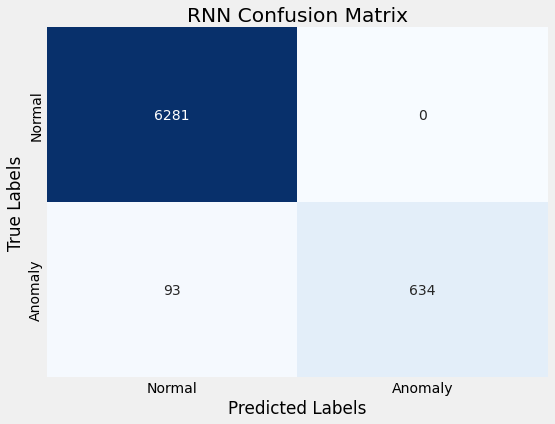

In [75]:
# Plot confusion matrix for RNN model
rnn_cm = confusion_matrix(y_test, rnn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RNN Confusion Matrix')
plt.show()


### MLP Model

In [76]:
# Define the MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [77]:
# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [78]:
# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
876/876 [==============================] - 3s 3ms/step - loss: 0.2082 - accuracy: 0.9449 - val_loss: 0.1118 - val_accuracy: 0.9458
Epoch 2/10
876/876 [==============================] - 2s 2ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0327 - val_accuracy: 0.9926
Epoch 3/10
876/876 [==============================] - 2s 2ms/step - loss: 0.0399 - accuracy: 0.9846 - val_loss: 0.0372 - val_accuracy: 0.9836
Epoch 4/10
876/876 [==============================] - 2s 3ms/step - loss: 0.0333 - accuracy: 0.9876 - val_loss: 0.0177 - val_accuracy: 0.9980
Epoch 5/10
876/876 [==============================] - 2s 2ms/step - loss: 0.0220 - accuracy: 0.9914 - val_loss: 0.0140 - val_accuracy: 0.9987
Epoch 6/10
876/876 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 0.9900 - val_loss: 0.0123 - val_accuracy: 0.9981
Epoch 7/10
876/876 [==============================] - 2s 2ms/step - loss: 0.0242 - accuracy: 0.9894 - val_loss: 0.0202 - val_accuracy: 0.9887
Epoch 

In [79]:
# Evaluate the model
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test, y_test)
print('MLP Test accuracy:', mlp_test_acc)


219/219 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9919
MLP Test accuracy: 0.991866409778595


In [80]:
# Make predictions
mlp_y_pred_prob = mlp_model.predict(X_test)
mlp_y_pred = (mlp_y_pred_prob > 0.5).astype(int)


219/219 [==============================] - 0s 914us/step


In [81]:
# Print confusion matrix
print("MLP Confusion Matrix:")
print(confusion_matrix(y_test, mlp_y_pred))


MLP Confusion Matrix:
[[6281    0]
 [  57  670]]


In [82]:
# Print classification report
print("\nMLP Classification Report:")
print(classification_report(y_test, mlp_y_pred))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6281
           1       1.00      0.92      0.96       727

    accuracy                           0.99      7008
   macro avg       1.00      0.96      0.98      7008
weighted avg       0.99      0.99      0.99      7008



<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 8.73999999999998, 'Predicted Labels')

Text(24.579999999999995, 0.5, 'True Labels')

Text(0.5, 1.0, 'MLP Confusion Matrix')

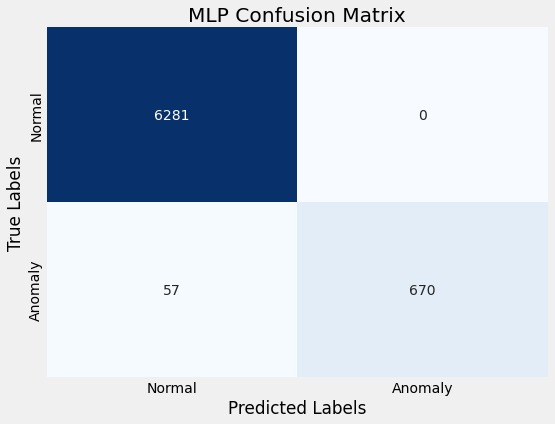

In [83]:
# Plot confusion matrix for MLP model
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MLP Confusion Matrix')
plt.show()


Text(0.5, 0, 'Models')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Evaluation Metrics by Model')

([<matplotlib.axis.XTick at 0x1be33d11430>,
 [Text(0.30000000000000004, 0, 'CNN'),
  Text(1.3, 0, 'RNN'),
  Text(2.3, 0, 'MLP')])

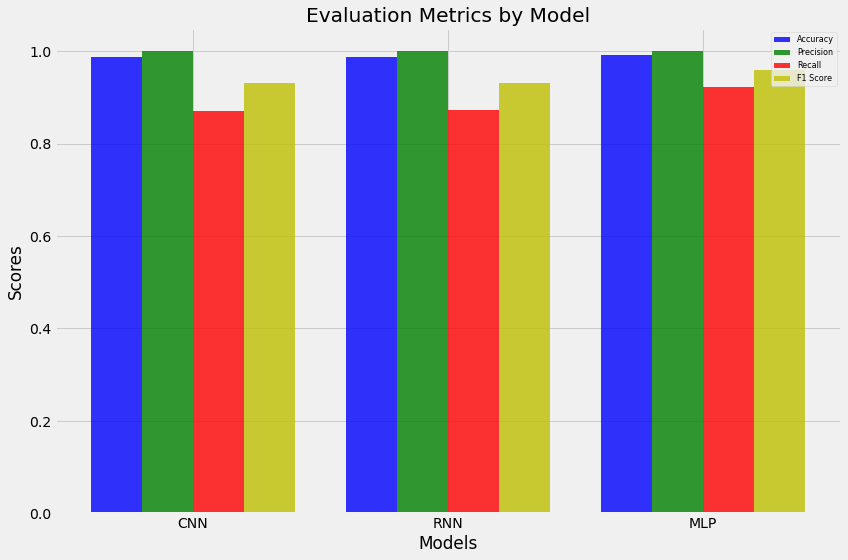

In [89]:
# Define evaluation metrics for each model
models = ['CNN', 'RNN', 'MLP']
accuracy = [test_acc, rnn_test_acc, mlp_test_acc]
precision = [precision_score(y_test, y_pred), precision_score(y_test, rnn_y_pred), precision_score(y_test, mlp_y_pred)]
recall = [recall_score(y_test, y_pred), recall_score(y_test, rnn_y_pred), recall_score(y_test, mlp_y_pred)]
f1 = [f1_score(y_test, y_pred), f1_score(y_test, rnn_y_pred), f1_score(y_test, mlp_y_pred)]

# Plot evaluation metrics
fig, ax = plt.subplots(figsize=(12, 8))
index = range(len(models))

bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, accuracy, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar([p + bar_width for p in index], precision, bar_width, alpha=opacity, color='g', label='Precision')
rects3 = plt.bar([p + 2 * bar_width for p in index], recall, bar_width, alpha=opacity, color='r', label='Recall')
rects4 = plt.bar([p + 3 * bar_width for p in index], f1, bar_width, alpha=opacity, color='y', label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Model')
plt.xticks([p + 1.5 * bar_width for p in index], models)
plt.legend(prop={'size': 8})

plt.tight_layout()
plt.show()
